In [1]:
import numpy as np
from SGD import SGDDenoiser

# Image Denoising
## Loading Data and Adding Noise

In [2]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

train_y = faces['images'][0]
test_y = faces['images'][1]

In [3]:
train_x = train_y + np.random.randn(train_y.shape[0], train_y.shape[1]) / 50
test_x = test_y + np.random.randn(test_y.shape[0], test_y.shape[1]) / 50

train_x = np.clip(train_x, 0, 1)
test_x = np.clip(test_x, 0, 1)

## Denoising

In [4]:
np.random.seed(42)

ROW, COL = 9, 9
SGD_denoiser = SGDDenoiser(ROW,COL)

SGD_denoiser.fit(train_x, train_y, epochs=5000, lr=0.5, verbose=True)

Epoch 100 | Error (* 1e6): 34.18
Epoch 200 | Error (* 1e6): 22.28
Epoch 300 | Error (* 1e6): 16.66
Epoch 400 | Error (* 1e6): 13.50
Epoch 500 | Error (* 1e6): 11.46
Epoch 600 | Error (* 1e6): 10.00
Epoch 700 | Error (* 1e6): 8.88
Epoch 800 | Error (* 1e6): 7.98
Epoch 900 | Error (* 1e6): 7.25
Epoch 1000 | Error (* 1e6): 6.64
Epoch 1100 | Error (* 1e6): 6.12
Epoch 1200 | Error (* 1e6): 5.68
Epoch 1300 | Error (* 1e6): 5.30
Epoch 1400 | Error (* 1e6): 4.97
Epoch 1500 | Error (* 1e6): 4.68
Epoch 1600 | Error (* 1e6): 4.43
Epoch 1700 | Error (* 1e6): 4.21
Epoch 1800 | Error (* 1e6): 4.01
Epoch 1900 | Error (* 1e6): 3.84
Epoch 2000 | Error (* 1e6): 3.68
Epoch 2100 | Error (* 1e6): 3.54
Epoch 2200 | Error (* 1e6): 3.41
Epoch 2300 | Error (* 1e6): 3.29
Epoch 2400 | Error (* 1e6): 3.19
Epoch 2500 | Error (* 1e6): 3.09
Epoch 2600 | Error (* 1e6): 3.01
Epoch 2700 | Error (* 1e6): 2.93
Epoch 2800 | Error (* 1e6): 2.85
Epoch 2900 | Error (* 1e6): 2.78
Epoch 3000 | Error (* 1e6): 2.72
Epoch 3100 | 

## Visualizing the Output

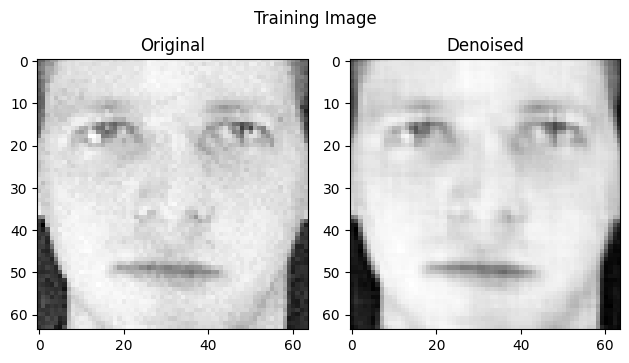

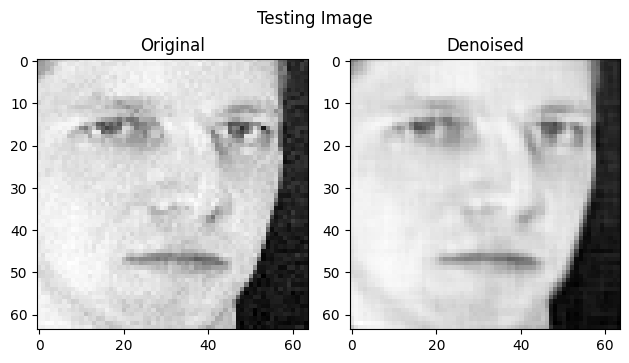

In [5]:
import matplotlib.pyplot as plt

def plot_denoised_img(input, title):
    fig, ax = plt.subplots(1,2)

    pred = SGD_denoiser.predict(input)

    ax[0].imshow(input, cmap = "Grays_r")
    ax[1].imshow(pred, cmap = "Grays_r")

    ax[0].set_title("Original")
    ax[1].set_title("Denoised")

    fig.suptitle(title, y=0.85)
    plt.tight_layout()

    plt.show()

plot_denoised_img(train_x, "Training Image")
plot_denoised_img(test_x, "Testing Image")

## Visualizing the Filter

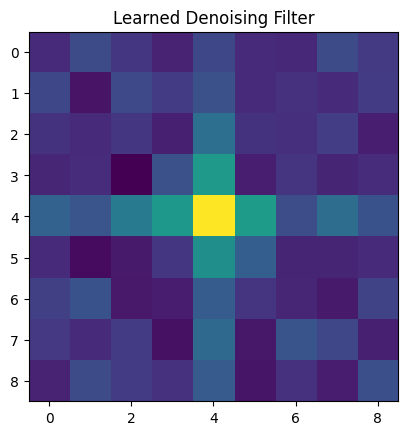

In [6]:
filter = SGD_denoiser.get_filter()

plt.imshow(filter)
plt.title("Learned Denoising Filter")
plt.show()